In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [7]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至“总通最大值”
data = data.iloc[:, 6:-3]

# 打印数据的前几行
print(data.head()) 

   重量平均值    重量相对偏差  重量标准偏差  重量变异系数  重量最小值  重量最大值  吸阻平均值    吸阻相对偏差  吸阻标准偏差  \
0  0.516  0.006524   0.011   2.202  0.499  0.538  1.275  0.041404   0.048   
1  0.515  0.004573   0.012   2.350  0.482  0.545  1.321  0.006820   0.046   
2  0.507  0.011032   0.012   2.316  0.477  0.524  1.291  0.029375   0.049   
3  0.507  0.011032   0.013   2.549  0.479  0.529  1.296  0.025616   0.059   
4  0.509  0.007131   0.009   1.863  0.486  0.531  1.350  0.014984   0.058   

   吸阻变异系数  ...  嘴通平均值  嘴通标准偏差  嘴通变异系数  嘴通最小值  嘴通最大值  总通平均值  总通标准偏差  总通变异系数  \
0   3.784  ...   38.0   2.073   5.453   33.7   41.4   44.6   2.006   4.502   
1   3.465  ...   36.1   2.202   6.105   31.3   39.6   43.0   2.106   4.904   
2   3.802  ...   34.8   1.802   5.184   30.9   37.4   42.0   1.810   4.308   
3   4.587  ...   36.3   1.884   5.196   31.4   41.4   42.8   2.027   4.739   
4   4.322  ...   36.3   1.598   4.407   33.1   39.9   42.0   1.577   3.751   

   总通最小值  总通最大值  
0   40.1   48.0  
1   37.8   47.0  
2   38.4   45.

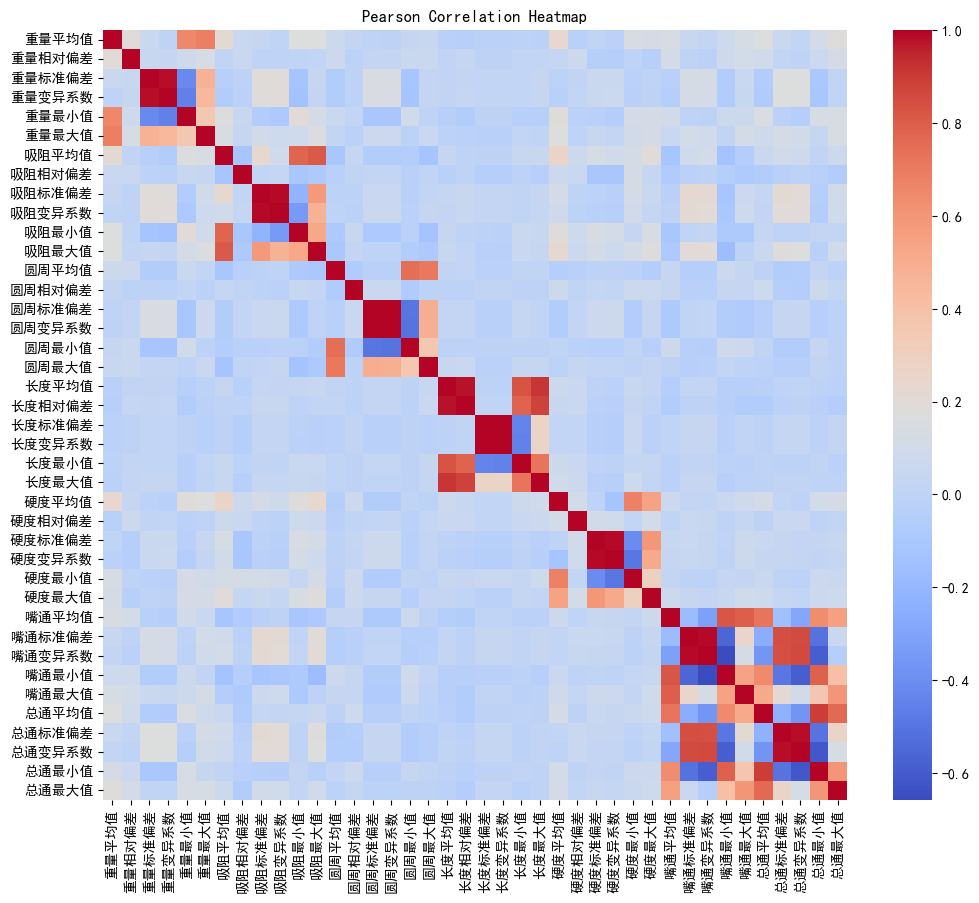

In [8]:
# 计算pearson相关系数矩阵
correlation_matrix = data.corr(method='pearson')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

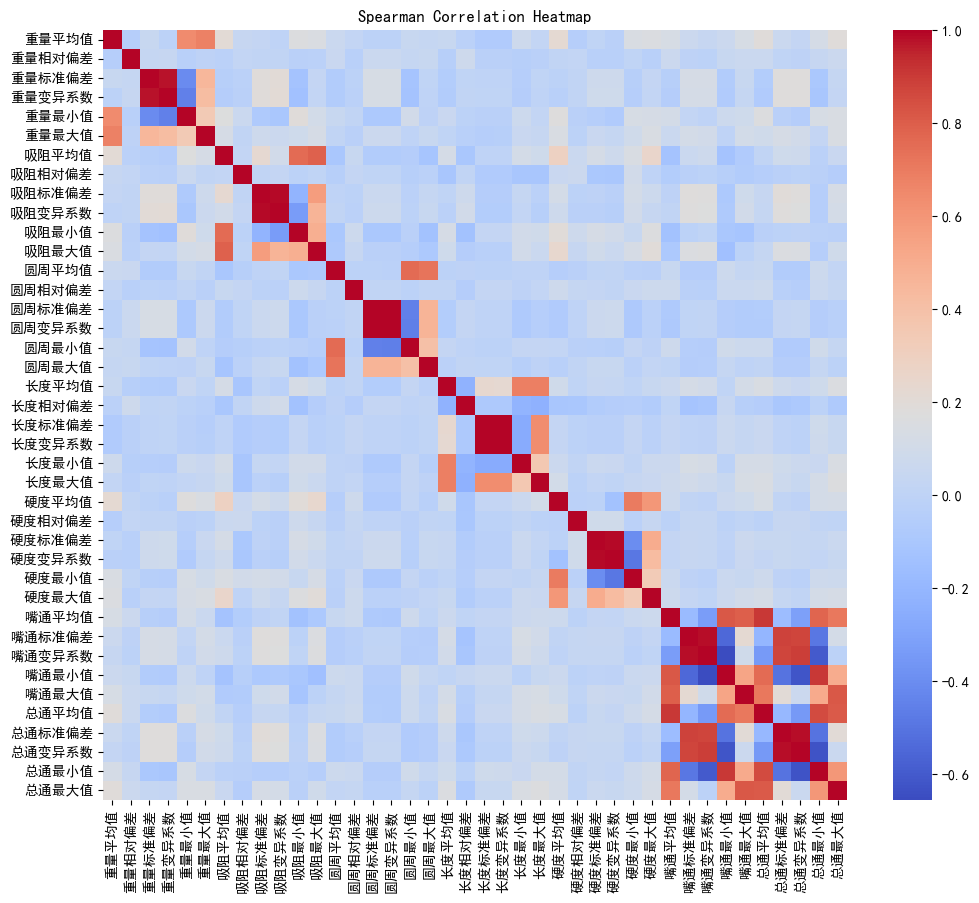

In [9]:
# 1. 计算Spearman相关系数矩阵
correlation_matrix = data.corr(method='spearman')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [3]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在缺失值，打印缺失值的索引
        print("缺失值的索引：")
        print(df[df.isnull().any(axis=1)].index.tolist())

        print("数据中存在缺失值，正在处理...")

        df = df.fillna(df.mean())  # 用均值填充缺失值
        print("缺失值已处理。")
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

data = preprocess_data(data)

缺失值的索引：
[592, 593, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]
数据中存在缺失值，正在处理...
缺失值已处理。
异常值已处理。


In [4]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
print("原始数据的统计信息:")
print(data.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_data_numpy = scaler.fit_transform(data)
# 为了方便查看，可以将其转换回DataFrame
scaled_data = pd.DataFrame(scaled_data_numpy, columns=data.columns)

print("\n-------------------------------------------------")
print("\n标准化后数据的统计信息:")
print(scaled_data.describe())

原始数据的统计信息:
             重量平均值       重量相对偏差       重量标准偏差       重量变异系数        重量最小值  \
count  1237.000000  1237.000000  1237.000000  1237.000000  1237.000000   
mean      0.512656     0.007065     0.010463     2.044025     0.490781   
std       0.004634     0.005635     0.001535     0.294834     0.006928   
min       0.501000     0.000087     0.005000     1.006000     0.466000   
25%       0.509500     0.002623     0.009000     1.838300     0.486000   
50%       0.512000     0.005744     0.010300     2.044000     0.491000   
75%       0.515200     0.010425     0.011200     2.222000     0.495000   
max       0.531000     0.035783     0.017100     3.347000     0.518000   

             重量最大值        吸阻平均值       吸阻相对偏差       吸阻标准偏差       吸阻变异系数  ...  \
count  1237.000000  1237.000000  1237.000000  1237.000000  1237.000000  ...   
mean      0.534255     1.330071     0.019747     0.049897     3.750157  ...   
std       0.007185     0.034055     0.016288     0.008702     0.636770  ...   
min   

In [22]:
# 进行PCA降维
from sklearn.decomposition import PCA
# 1. 创建PCA对象，设置主成分数为6
pca = PCA(n_components=6)
# 2. 拟合数据并转换
pca_data = pca.fit_transform(scaled_data)
# 3. 将PCA结果转换为DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\n-------------------------------------------------")
print("PCA降维后的数据:")
print(pca_df.head())


-------------------------------------------------
PCA降维后的数据:
        PC1       PC2       PC3       PC4       PC5       PC6
0 -1.162791  0.465658 -0.740544  1.458765 -0.874787  2.774445
1 -4.189703 -0.005189 -0.430973  1.063486  0.316511  0.902606
2 -3.517600 -2.186611  0.305619  1.203097  0.481647 -1.382835
3 -3.768843  0.773535 -0.151642  2.363634  0.210951 -0.365270
4 -1.779127 -1.218859  0.230573  0.096897  1.709817 -0.385574



每个主成分的方差解释率:
[0.14120624 0.09901065 0.09044604 0.07727757 0.07023174 0.06340032]

前两个主成分解释的总方差: 24.02%
前五个主成分解释的总方差: 47.82%


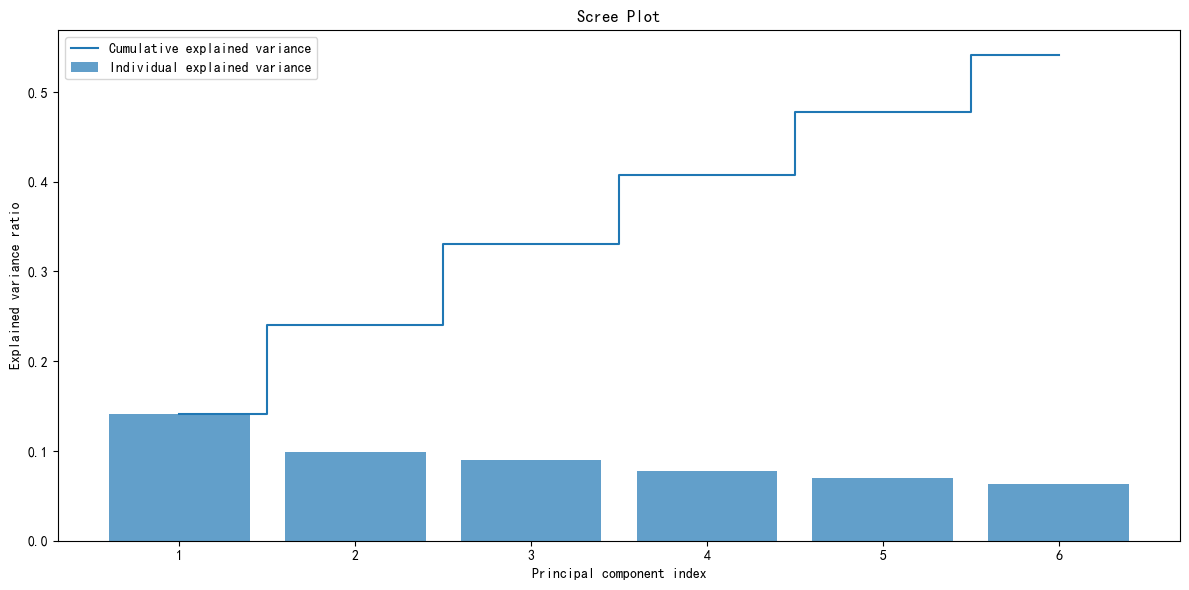

In [23]:
# 获取每个主成分的方差解释率
explained_variance = pca.explained_variance_ratio_

print("\n每个主成分的方差解释率:")
print(explained_variance)

print(f"\n前两个主成分解释的总方差: {sum(explained_variance[:2]):.2%}")
print(f"前五个主成分解释的总方差: {sum(explained_variance[:5]):.2%}")

# 可视化方差解释率 (Scree Plot)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 1 + pca.n_components_), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, 1 + pca.n_components_), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.xticks(range(1, 1 + pca.n_components_))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

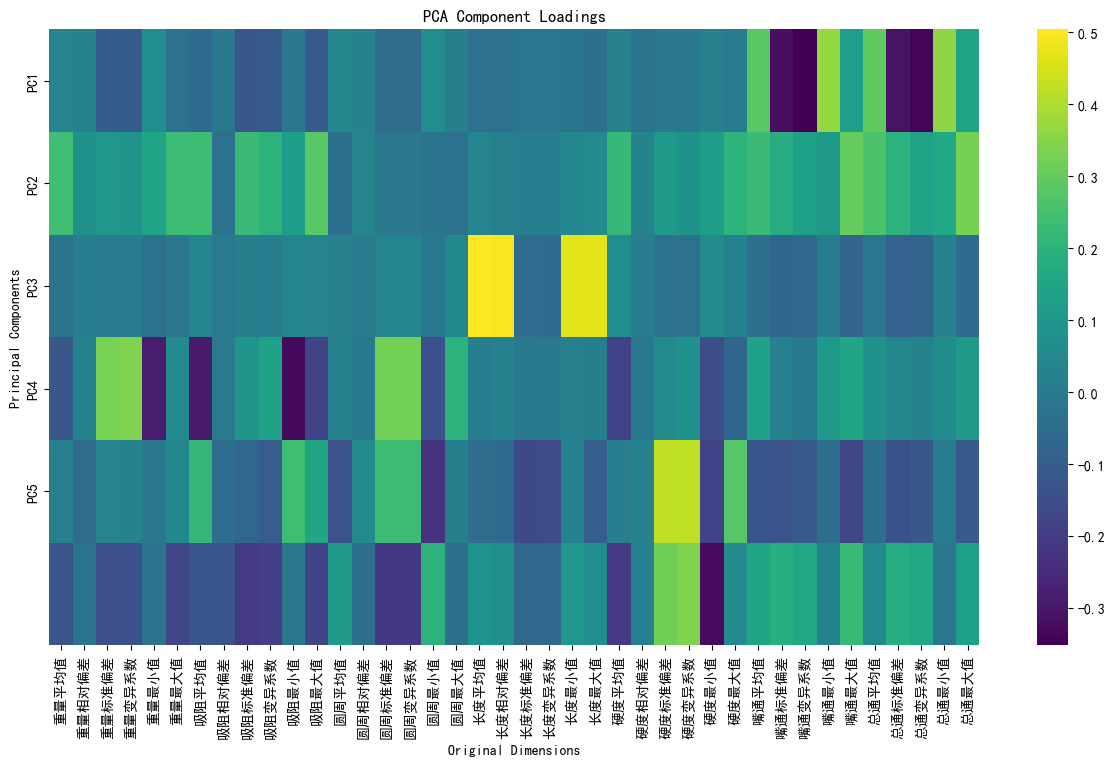

In [24]:
# 查看主成分载荷 (pca.components_的形状是 [n_components, n_features])
# 我们用热力图来可视化前几个主成分的载荷
plt.figure(figsize=(15, 8))
seaborn.heatmap(pca.components_, cmap='viridis', annot=False, 
            xticklabels=data.columns, yticklabels=[f'PC{i+1}' for i in range(5)])
plt.title('PCA Component Loadings')
plt.xlabel('Original Dimensions')
plt.ylabel('Principal Components')
plt.show()


保留95%方差后，数据维度从40降到了 18 维。


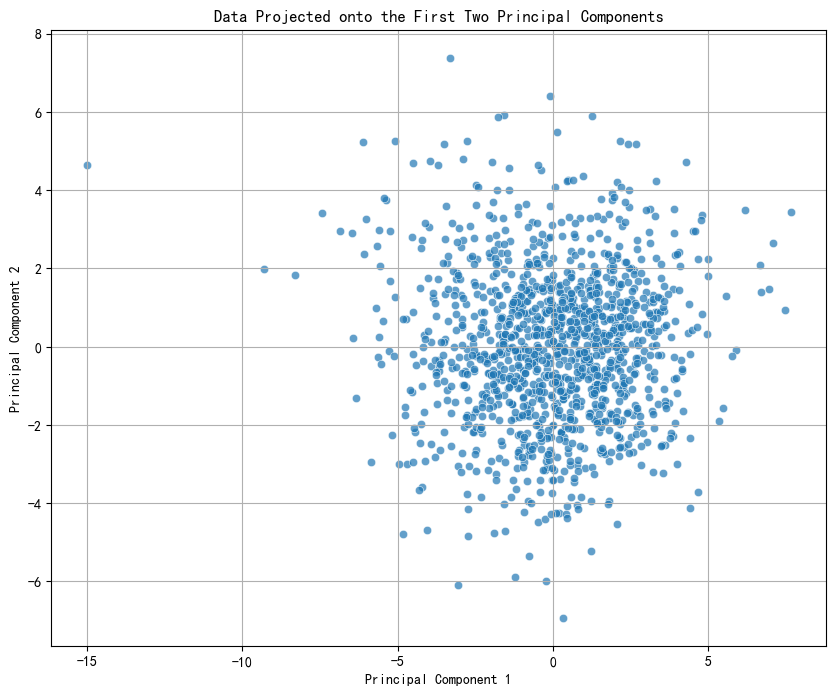

In [27]:
# 1. 决定要保留的主成分数量
# 我们可以根据方差解释率来决定，例如保留95%的方差
# scikit-learn允许直接传入一个浮点数
pca_reduced = PCA(n_components=0.95) 
scaled_data_reduced = pca_reduced.fit_transform(scaled_data)
print(f"\n保留95%方差后，数据维度从40降到了 {pca_reduced.n_components_} 维。")

# 2. 将数据投影到前两个主成分上进行可视化
# 创建一个新的DataFrame用于绘图
pca_df_2d = pd.DataFrame(data = pca_data[:, :2], columns = ['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
seaborn.scatterplot(x='PC1', y='PC2', data=pca_df_2d, alpha=0.7)
plt.title('Data Projected onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()